In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from setuptools.command.rotate import rotate

warnings.filterwarnings('ignore')

In [37]:
train=pd.read_csv('dirty_deputies_v2.csv')

In [38]:
train.head()

,deputy_name,deputy_state,political_party,refund_description,company_name,company_id,refund_date,refund_value,party_pg,party_en,party_tse,party_regdate,party_nmembers,party_ideology1,party_ideology2,party_ideology3,party_ideology4,party_position
0,PROFESSORA DORINHA SEABRA REZENDE,TO,DEM,FLIGHT TICKET,Cia Aérea - TAM,2.012862e+12,2016-07-29T00:00:00,937.63,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
1,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,3.065970e+11,2016-06-21T00:00:00,150.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
2,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,3.065970e+11,2016-06-01T00:00:00,100.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
3,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,MEGA POSTO BERIMBAU LTDA - ME,1.855960e+12,2016-04-19T00:00:00,168.07,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
4,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,MEGA POSTO BERIMBAU LTDA - ME,1.855960e+12,2016-08-13T00:00:00,239.57,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing


In [39]:
def show_box_plot(df):
    sns.boxplot(df)
    plt.xlabel('Data Distribution')
    plt.show()

In [40]:
train.shape

(339089, 18)

In [41]:
shape1=train.shape[0]

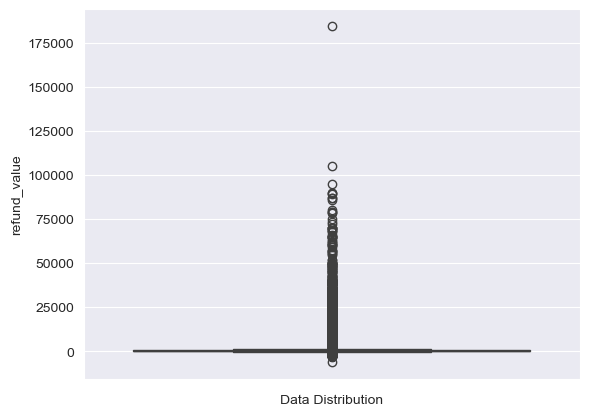

In [42]:
show_box_plot(train['refund_value'])

In [43]:
out=[]
def outlier_iqr(df):
    q3=df.quantile(0.75)
    q1=df.quantile(0.25)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    for i in df:
        if i < lower_limit or i > upper_limit:
            out.append(i)
    print(out)
outlier_iqr(train['refund_value'])

[3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 3500.0, 1407.72, 1410.83, 3500.0, 3500.0, 2500.0, 1464.0, 1216.35, 1261.42, 18000.0, 10000.0, 12000.0, 7073.17, 8695.12, 6987.95, 1500.0, 3000.0, 3000.0, 12375.1, 5000.0, 4073.17, 15000.0, 2227.63, 15000.0, 15000.0, 8000.0, 8000.0, 12500.0, 18000.0, 1534.44, 1257.3, 1449.58, 1756.82, 2346.47, 1445.14, 1914.63, 1457.3, 1901.56, 1264.32, 2205.08, 1391.39, 1821.35, 15000.0, 15000.0, 15000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 1412.68, 1613.69, -740.63, 1694.18, 2022.96, 2455.48, 3131.29, 3533.81, 3310.14, 1237.24, 1196.15, 1209.14, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 3693.94, 3950.5, 2500.0, 2500.0, 3137.2, 4140.0, 3917.2, 2281.38, 3738.3, 1455.67, 3372.0, 2500.0, 4000.0, 4000.0, 3000.0, 4000.0, 4000.0, 4000.0, 3898.8, 2750.0, -770.1, 1489.69, 1613.69, 1464.63, 1320.76, 2500.0, 1573.41, 1412.68, 3187.68, 5209.82, 4346.83, 1193.43

In [44]:
out=[]
def winsorization(df):
    q1=np.percentile(df,1)
    q3=np.percentile(df,99)
    for i in df:
        if i>q3 or i<q1:
            out.append(i)
    print(out)
winsorization(train['refund_value'])








[18000.0, 10000.0, 12000.0, 12375.1, 15000.0, 15000.0, 15000.0, 12500.0, 18000.0, 15000.0, 15000.0, 15000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, -740.63, -770.1, -1172.58, -1947.58, -1024.59, -919.63, -1884.63, -1486.58, -1521.58, -1886.58, -1773.63, -1277.63, -1587.67, -1241.34, -807.93, -1318.28, -1269.63, -1461.63, -827.58, -1191.38, 20500.0, 24450.0, -796.35, -1109.25, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 20000.0, 12000.0, 20000.0, 14000.0, 16000.0, 19000.0, 30000.0, 10000.0, 15000.0, 12000.0, 19000.0, 10000.0, 10000.0, 9753.11, 10000.0, 10000.0, 25000.0, 20000.0, 26000.0, 26000.0, 17000.0, 20000.0, 25000.0, 20000.0, 10000.0, 17892.0, 20000.0, 12000.0, 18000.0, 18000.0, 14000.0, -952.69, -754.63, -840.58, -1316.98, -751.98, -1479.69, -1572.35, -1228.98, -743.35, -1244.69, -2022.98, -1613.72, -1613.72, -1479.69, -13

In [45]:
def drop_outliers(df,field_name):
    iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)
drop_outliers(train,'refund_value')


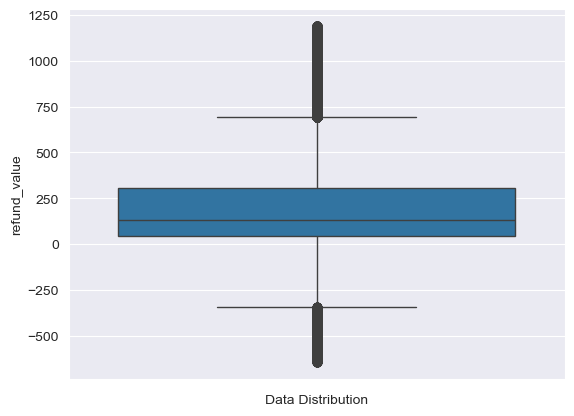

In [46]:
show_box_plot(train['refund_value'])

In [47]:
shape2=train.shape[0]

In [48]:
print(shape1-shape2)

40869
